In [138]:
import numpy as np
import matplotlib.pyplot as py
from scipy import stats

In [139]:
a = 0
b = 10
mu = 1
def func(x):
    return np.exp(-2*np.absolute(x-5))

def dist(x):
    return (1/(2*np.pi*mu**2)**0.5)*np.exp(-((x-5)**2)/(2*mu**2))

def uniform(x):
    return stats.uniform(a,b).pdf(x)

func(0)/dist(0) - func(10)/dist(10)

0.0

In [140]:

count = 10000
x_data = range(count)
mean_value = []
error_value = []
std = []


x1 = np.random.uniform(a,b,count)
x = stats.norm(loc= 5, scale= 1)
yx = x.rvs(count)

y = func(yx)/dist(yx)
mean_simple = []
error_simple = []
std_simple = []

z = func(x1)

for i in range(count):
        means = np.mean(y[:i+1])
        mean_value.append(means)
        value = np.std(y[:i+1])
        error = value/(i+1)**0.5
        error_value.append(error)
        std.append(value)

        means_simple = np.mean(z[:i+1])*(b-a)
        mean_simple.append(means_simple)
        values_simple = np.std(z[:i+1]*(b-a))
        errors_simple = values_simple/(i+1)**0.5
        error_simple.append(errors_simple)
        std_simple.append(values_simple)

print(f"Importance sampling value is: {mean_value[-1]} and simple sampling value is: {mean_simple[-1]}")
print(f"Importance sampling error value is: {error_value[-1]} and simple sampling error value is: {error_simple[-1]}")


Importance sampling value is: 1.0013874863805523 and simple sampling value is: 1.030211098105696
Importance sampling error value is: 0.006001498597917528 and simple sampling error value is: 0.020288212614636727


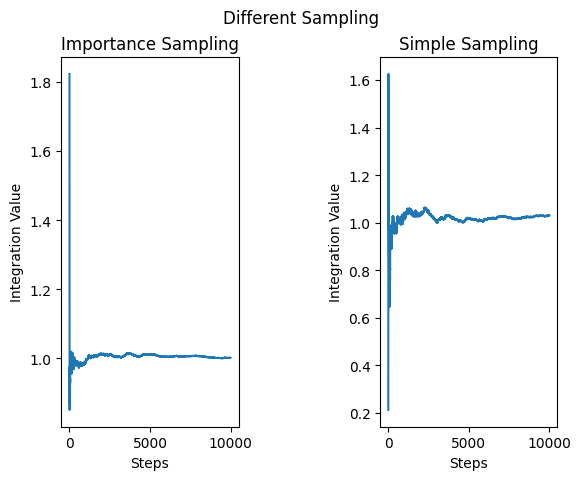

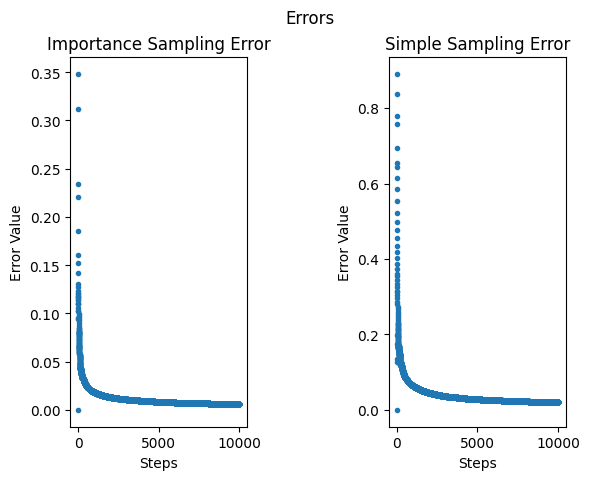

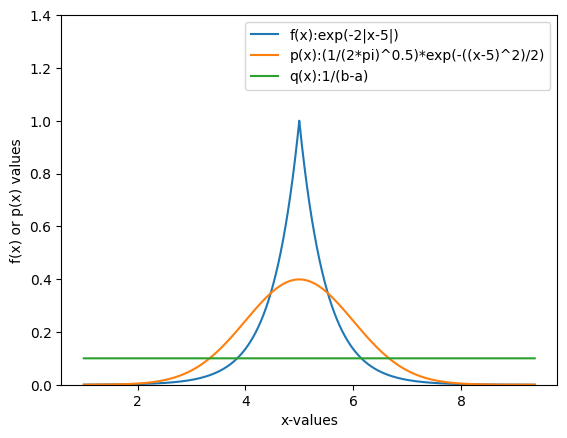

In [141]:
py.subplot(1,2,1)
py.xlabel("Steps")
py.ylabel("Integration Value")
py.plot(x_data,mean_value)
py.title("Importance Sampling")

py.subplot(1,2,2)
py.plot(x_data,mean_simple)
py.xlabel("Steps")
py.ylabel("Integration Value")
py.title("Simple Sampling")

py.suptitle("Different Sampling")
py.subplots_adjust(wspace=0.8)
py.show()
#################################################################3
py.subplot(1,2,1)
py.xlabel("Steps")
py.ylabel("Error Value")
py.scatter(x_data,error_value, marker=".")
py.title("Importance Sampling Error")

py.subplot(1,2,2)
py.scatter(x_data,error_simple, marker= ".")
py.xlabel("Steps")
py.ylabel("Error Value")
py.title("Simple Sampling Error")

py.suptitle("Errors")
py.subplots_adjust(wspace=0.8)
py.show()
###############################################################
sorted = np.sort(yx)
py.plot(sorted, func(sorted))
py.plot(sorted, dist(sorted))
py.plot(sorted,np.random.randint(1,1+1,len(sorted))/(b-a))
py.legend(["f(x):exp(-2|x-5|)","p(x):(1/(2*pi)^0.5)*exp(-((x-5)^2)/2)","q(x):1/(b-a)"])
py.xlabel("x-values")
py.ylabel("f(x) or p(x) values")
py.ylim(0,1.4)
py.show()

In [142]:
np.mean(func(yx)/dist(yx))

1.0013874863805523

In [143]:
np.mean(y)*(b-a)

10.013874863805523